First step is to Import the required packages for Data Analysis

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
import warnings
warnings.filterwarnings('ignore')

Second step is reading the data.
Data of apps in the play store can be downloaded from Kaggle and save in local directory!

In [105]:
df = pd.read_csv("googleplaystore.csv")

#Displaying the first five rows from data set
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


The third step is Data Preprocessing

First process in Data Preprocessing is handling the NULL values in the data set

In [106]:
print(df.isnull().sum())

#Dropping Rows with Null values
df.dropna(inplace=True) 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [107]:
#There are 1474 NULL values in Rating, 1 in Type, 1 in Content Rating, 8 in Current Ver and 3 in Android Ver

In [108]:
# We have to remove the Duplicate entries
df.drop_duplicates(inplace=True)

In [109]:
df.shape

(8886, 13)

In [110]:
#We have 8886 apps to analyze after removing the rows with Null values and the duplicate entries!

Second step in the Data Preprocessing is to handle the Data Types of each Feature

The type of some features can be in different formats, so data types has to be changed to a proper format which can be used for analysis.

In [111]:
# Displaying Data types of each feature
df.dtypes 

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

The feature Reviews is of type object, but it should be of numerical type. So we have to change the type

In [112]:
#Changing to int type.
df.Reviews = df.Reviews.astype('int64') 

Apart from Reviews, other Features like Price,Android,Installs and Size Vers also must be of numeric type.
The values that the Features are holding now should be changed to the proper format to use them for analysis and plots.

Changing the Feature : Installs

In [113]:
newInstalls = []

for row in df.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
    

df.Installs = newInstalls

df.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

Changing the feature : Size

In [114]:
newSize = []

for row in df.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0) #When it says - Size Varies.
    
df.Size = newSize

df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

Changing the feature, Price

In [115]:
newPrice = []

for row in df.Price:
    if row!= "0":
        newrow = float(row[1:])
    else:
        newrow = 0 
        
    newPrice.append(newrow)
        
df.Price = newPrice

df.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

Changing the feature, Android Ver

In [116]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

The fourth step is Analyzing Features

Categories

In [117]:
#Displaying all the categories and their counts.

In [118]:
df.Category.value_counts() 

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

<AxesSubplot:>

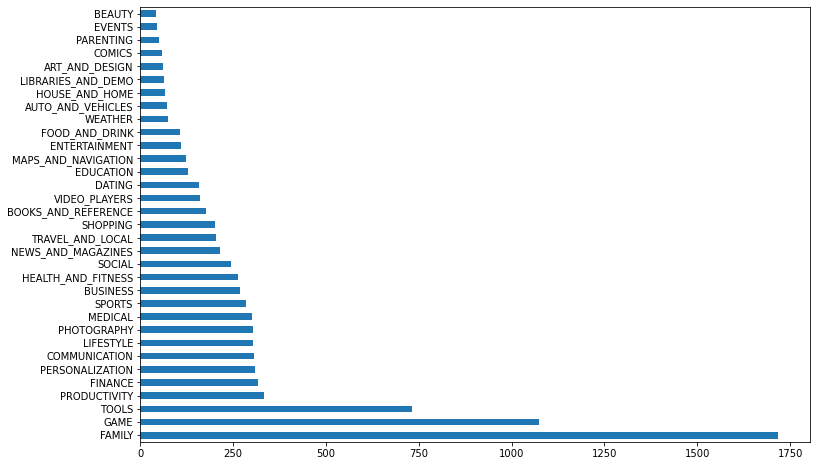

In [119]:
df.Category.value_counts().plot(kind='barh',figsize= (12,8))

In [120]:
#Insight : The Game and Family Category has the maximum number of Apps 

Rating

In [121]:
df.Rating.describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

'Rating' - Distribution Plot

<AxesSubplot:xlabel='Rating', ylabel='Density'>

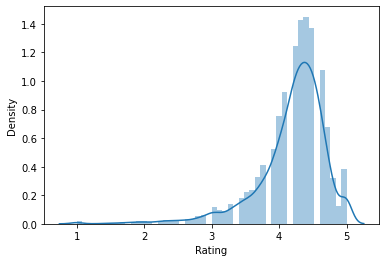

In [122]:
sns.distplot(df.Rating)

In [123]:
#Insight : Most of the apps have a rating above 4.0, And a lot of them seems to have 5.0 rating.

In [124]:
print("No. of Apps with full ratings: ",df.Rating[df['Rating'] == 5 ].count())

No. of Apps with full ratings:  271


In the the play store total of 271 Apps hold 5.0 Ratings.

Reviews

'Reviews' -  Distribution Plot

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

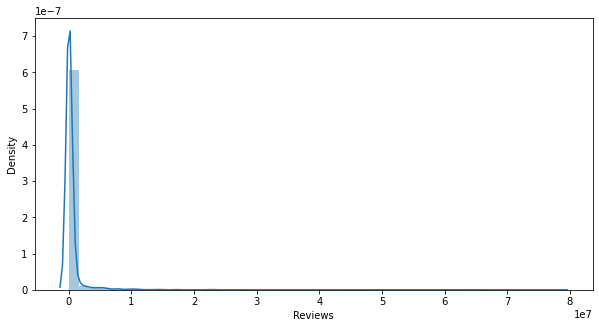

In [125]:
plt.figure(figsize=(10,5))
sns.distplot(df.Reviews)

In [126]:
#Get the list of apps which have good Reviews

In [127]:
df[df.Reviews>40000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
1670,Clash of Clans,GAME,4.6,44891723,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
1879,Clash of Clans,GAME,4.6,44893888,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
2544,Facebook,SOCIAL,4.1,78158306,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,0.0
2545,Instagram,SOCIAL,4.5,66577313,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0


In [128]:
#Insight : The top reviewed Apps are the most famous social media apps like Instagram, WhatsApp, Facebook and Gaming app Clash of Clans.

Type:

([<matplotlib.patches.Wedge at 0x2d455477fa0>,
 [Text(-1.0744351676595925, 0.2357733456018803, 'Free'),
  Text(1.0744351566222443, -0.23577339589982083, 'Paid')],
 [Text(-0.5860555459961413, 0.12860364305557104, '93.1%'),
  Text(0.5860555399757695, -0.12860367049081134, '6.9%')])

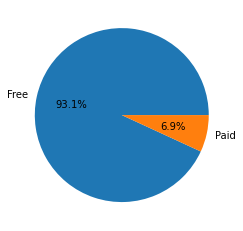

In [129]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

In [130]:
#Insight: Only 6.9% are paid apps, remaining 93.1% of the apps in the Play Store are free

Price

In [131]:
df[df.Price == df.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.0


In [132]:
#Insight : I'm Rich - Trump Edition is the most costly App in the Store. The Price is 400 Dollars

Android Version

In [133]:
df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

Count Plot for the various Versions

<AxesSubplot:xlabel='Android Ver', ylabel='count'>

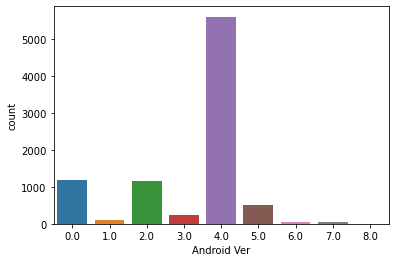

In [134]:
sns.countplot(df['Android Ver'])

In [135]:
#Insight : Most of the apps in the store support Android version 4.0 and above.

Furthur Analysis on Play store apps

Looking at the Apps with a rating of 5.0:

In [136]:
df_full = df[df.Rating == 5]

df_full.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0
615,Awake Dating,DATING,5.0,2,70.0,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.0
633,Spine- The dating app,DATING,5.0,5,9.3,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0


Distribution plot - 'Installs' of Apps with a rating of 5.0

<AxesSubplot:xlabel='Installs', ylabel='Density'>

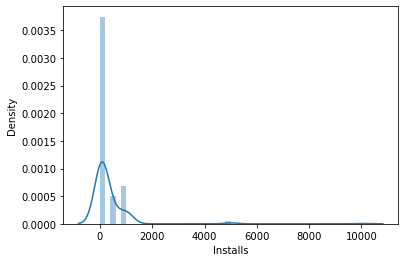

In [137]:
sns.distplot(df_full.Installs)

In [138]:
df_full.Installs.value_counts().sort_index()

1.0          3
5.0          8
10.0        48
50.0        32
100.0      112
500.0       27
1000.0      37
5000.0       3
10000.0      1
Name: Installs, dtype: int64

In [139]:
#Insight : There are many number of Apps in the play store with full ratings but less installs. So we can not consider those apps as the best apps in the store.


We will consider the Apps with 5.0 Ratings and Maximum number of downloads :

In [140]:
df_full_maxinstalls = df_full[df.Installs > 1000]

df_full_maxinstalls[['App', 'Category', 'Installs']]

,App,Category,Installs
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5000.0
8058,Oración CX,LIFESTYLE,5000.0
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5000.0
9511,Ek Bander Ne Kholi Dukan,FAMILY,10000.0


Checking the Number of Reviews of 5.0 Rating Apps

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

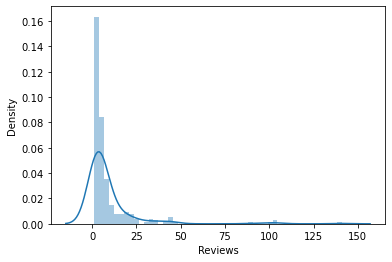

In [141]:
sns.distplot(df_full.Reviews)

The above distribution is clearly skewed. 
Apps with very few reviews easily managed to get rating of 5.0 and this can be misleading.
So we will filter out the apps with more than 30 reviews. These filtered ones based on reviews along with ratings are the apps that really matches for 5.0 rating.

In [142]:
df_full = df_full[df.Reviews > 30]

In [143]:
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",df_full.App.count())

No. of Apps having 5.0 Rating with sufficient Reviews:  16


<AxesSubplot:xlabel='Genres', ylabel='count'>

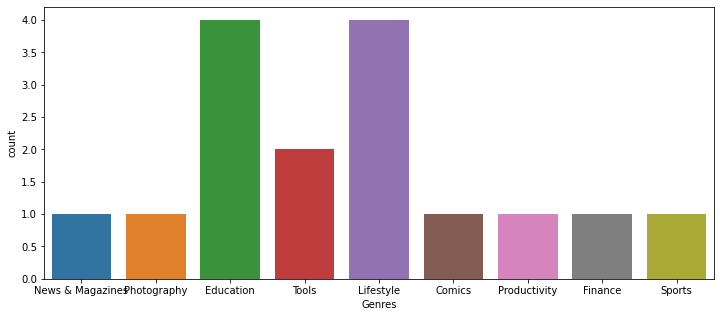

In [144]:
plt.figure(figsize=(12,5))
sns.countplot(df_full.Genres)

In [145]:
#Insight : Apps related to Education and LifeStyle Genres seems to have full Ratings with sufficient number of reviews.

<AxesSubplot:xlabel='Price', ylabel='count'>

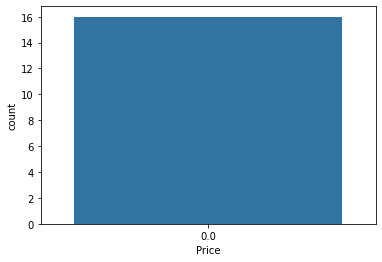

In [146]:
sns.countplot(df_full.Price)

In [148]:
#Insight : All the Apps with a rating of 5.0 are free to install from the store !

After performming an Exploratory analysis on Google Play Store Apps, we have got some meaningful insights out of it.

Maximum number of apps in the store belongs to the category Family. Most of the apps hold a rating above 4.0. And the most widely used social media apps like WhatsApp, Instagram, Facebook and Gaming App Clash of clans are highest reviewed apps. More than 90% of the apps in the store are free to install. Most of the apps support android version 4.0 and above. Apps related to Education and Lifestyle have full rating good number of reviews and those apps with 5.0 rating are free to install